# ANALISIS BIG DATA GEOSPATIAL - AKSESIBILITAS KESEHATAN DAN TRANSPORTASI
## 📍 Studi Kasus: Cibinong, Kabupaten Bogor, Jawa Barat
### Siti Nur Salamah (2206048833)
### Analisis Data Tidak Terstruktur (A)


# Import Libraries

In [ ]:
# 🔧 Install dependencies
!pip install osmnx --upgrade folium geopandas networkx matplotlib seaborn --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.5/100.5 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 338.0/338.0 kB 15.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 118.3 MB/s eta 0:00:00


In [ ]:
# 📚 Import libraries
import osmnx as ox
import networkx as nx
import matplotlib.pyplot as plt
import folium
import geopandas as gpd
import pandas as pd
import seaborn as sns
import numpy as np
from folium.plugins import HeatMap
import warnings
warnings.filterwarnings('ignore')

print("📦 Library berhasil diimport!")

📦 Library berhasil diimport!


# Data Collection

In [ ]:
print("🌍 Mengambil data jaringan jalan Cibinong...")

# Ambil jaringan jalan Cibinong, Kabupaten Bogor
place = "Cibinong, Bogor Regency, West Java, Indonesia"
G = ox.graph_from_place(place, network_type="drive")

# Konversi ke GeoDataFrame
nodes, edges = ox.graph_to_gdfs(G)

print(f"✅ Berhasil mengambil jaringan jalan Cibinong")
print(f"📊 Jumlah nodes (simpul): {len(nodes)}")
print(f"📊 Jumlah edges (jalan): {len(edges)}")

🌍 Mengambil data jaringan jalan Cibinong...
✅ Berhasil mengambil jaringan jalan Cibinong
📊 Jumlah nodes (simpul): 9076
📊 Jumlah edges (jalan): 21666


# Statistik Jaringan

In [ ]:
print("\n📊 Menghitung statistik jaringan...")

# Hitung statistik dasar
stats = ox.basic_stats(G)
stats_df = pd.Series(stats)

print("📈 Statistik Jaringan Cibinong:")
print("="*40)
for key, value in stats.items():
    if isinstance(value, float):
        print(f"{key}: {value:.2f}")
    else:
        print(f"{key}: {value}")


📊 Menghitung statistik jaringan...
📈 Statistik Jaringan Cibinong:
n: 9076
m: 21666
k_avg: 4.77
edge_length_total: 1284024.18
edge_length_avg: 59.26
streets_per_node_avg: 2.47
streets_per_node_counts: {0: 0, 1: 2743, 2: 2, 3: 5670, 4: 659, 5: 2}
streets_per_node_proportions: {0: 0.0, 1: 0.3022256500661084, 2: 0.00022036139268400177, 3: 0.624724548259145, 4: 0.07260907888937858, 5: 0.00022036139268400177}
intersection_count: 6333
street_length_total: 674018.88
street_segment_count: 11167
street_length_avg: 60.36
circuity_avg: 1.07
self_loop_proportion: 0.00


# Visualisasi Jaringan


🗺️ Membuat visualisasi jaringan...


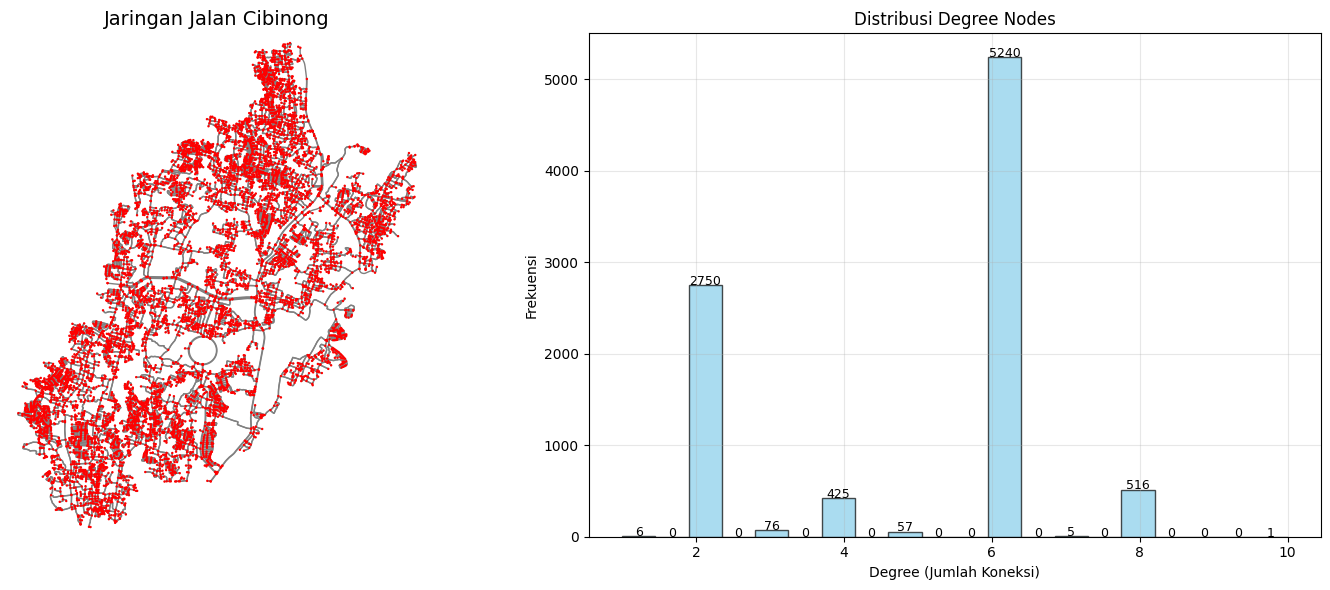

In [ ]:
print("\n🗺️ Membuat visualisasi jaringan...")

# Plot jaringan jalan dasar
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot 1: Jaringan dasar
ox.plot_graph(G, ax=ax1, node_size=3, edge_color="gray",
              node_color="red", show=False, close=False)
ax1.set_title("Jaringan Jalan Cibinong", fontsize=14)

# Plot 2: Distribusi degree nodes dengan angka frekuensi
degrees = [G.degree(n) for n in G.nodes()]
counts, bins, patches = ax2.hist(degrees, bins=20, alpha=0.7, color='skyblue', edgecolor='black')

# Tambahkan angka di atas setiap batang
for count, bin_left, bin_right in zip(counts, bins[:-1], bins[1:]):
    x_pos = (bin_left + bin_right) / 2
    ax2.text(x_pos, count + 0.5, str(int(count)), ha='center', fontsize=9)

ax2.set_xlabel("Degree (Jumlah Koneksi)")
ax2.set_ylabel("Frekuensi")
ax2.set_title("Distribusi Degree Nodes")
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Analisis Network Centrality

In [ ]:
print("\n📍 Melakukan analisis centrality...")

# Hitung berbagai jenis centrality
degree_centrality = nx.degree_centrality(G)
betweenness_centrality = nx.betweenness_centrality(G, k=1000)  # Sample untuk efisiensi
closeness_centrality = nx.closeness_centrality(G)

# Set sebagai atribut node
nx.set_node_attributes(G, degree_centrality, "degree_centrality")
nx.set_node_attributes(G, betweenness_centrality, "betweenness_centrality")
nx.set_node_attributes(G, closeness_centrality, "closeness_centrality")

# Temukan top 5 nodes berdasarkan degree centrality
top_degree_nodes = sorted(degree_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_betweenness_nodes = sorted(betweenness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]
top_closeness_nodes = sorted(closeness_centrality.items(), key=lambda x: x[1], reverse=True)[:5]

print("🏆 Top 5 Nodes - Degree Centrality:")
for i, (node, centrality) in enumerate(top_degree_nodes, 1):
    print(f"{i}. Node {node}: {centrality:.4f}")

print("\n🏆 Top 5 Nodes - Betweenness Centrality:")
for i, (node, centrality) in enumerate(top_betweenness_nodes, 1):
    print(f"{i}. Node {node}: {centrality:.4f}")

print("\n🏆 Top 5 Nodes - Closeness Centrality:")
for i, (node, centrality) in enumerate(top_closeness_nodes, 1):
    print(f"{i}. Node {node}: {centrality:.4f}")


📍 Melakukan analisis centrality...
🏆 Top 5 Nodes - Degree Centrality:
1. Node 1787973378: 0.0011
2. Node 1787969511: 0.0009
3. Node 1787972446: 0.0009
4. Node 1787972472: 0.0009
5. Node 1787973042: 0.0009

🏆 Top 5 Nodes - Betweenness Centrality:
1. Node 3120469694: 0.2526
2. Node 3120469632: 0.2525
3. Node 5209742453: 0.2110
4. Node 1787973336: 0.2067
5. Node 5309961845: 0.2062

🏆 Top 5 Nodes - Closeness Centrality:
1. Node 7062118040: 0.0253
2. Node 2181505101: 0.0253
3. Node 7050930597: 0.0252
4. Node 5487655132: 0.0251
5. Node 7064627464: 0.0251


# Fasilitas Kesehatan

In [ ]:
print("\n🏥 Mengambil data rumah sakit dan klinik...")

# Dictionary untuk menyimpan fasilitas kesehatan
health_facilities = {}

# Ambil rumah sakit
try:
    print("🔍 Mencari rumah sakit...")
    hospitals = ox.features_from_place(place, tags={'amenity': 'hospital'})

    if len(hospitals) == 0:
        # Fallback ke area yang lebih luas
        print("   Mencoba area Bogor yang lebih luas...")
        hospitals = ox.features_from_place("Bogor Regency, West Java, Indonesia",
                                         tags={'amenity': 'hospital'})
        hospitals = hospitals.head(3)  # Ambil 3 terdekat

    if len(hospitals) > 0:
        hospital_points = hospitals.copy()
        hospital_points['geometry'] = hospital_points.geometry.centroid
        hospital_points = hospital_points.reset_index()
        hospital_points['facility_type'] = 'hospital'
        hospital_points['facility_name'] = 'Rumah Sakit'
        health_facilities['hospital'] = hospital_points
        print(f"   ✅ Ditemukan {len(hospital_points)} rumah sakit")
    else:
        health_facilities['hospital'] = gpd.GeoDataFrame()
        print("   ❌ Tidak ditemukan rumah sakit")

except Exception as e:
    print(f"   ⚠️ Error mengambil rumah sakit: {e}")
    health_facilities['hospital'] = gpd.GeoDataFrame()

# Ambil klinik
try:
    print("🔍 Mencari klinik...")
    clinics = ox.features_from_place(place, tags={'amenity': 'clinic'})

    if len(clinics) == 0:
        # Fallback ke area yang lebih luas
        print("   Mencoba area Bogor yang lebih luas...")
        clinics = ox.features_from_place("Bogor Regency, West Java, Indonesia",
                                       tags={'amenity': 'clinic'})
        clinics = clinics.head(5)  # Ambil 5 terdekat

    if len(clinics) > 0:
        clinic_points = clinics.copy()
        clinic_points['geometry'] = clinic_points.geometry.centroid
        clinic_points = clinic_points.reset_index()
        clinic_points['facility_type'] = 'clinic'
        clinic_points['facility_name'] = 'Klinik'
        health_facilities['clinic'] = clinic_points
        print(f"   ✅ Ditemukan {len(clinic_points)} klinik")
    else:
        health_facilities['clinic'] = gpd.GeoDataFrame()
        print("   ❌ Tidak ditemukan klinik")

except Exception as e:
    print(f"   ⚠️ Error mengambil klinik: {e}")
    health_facilities['clinic'] = gpd.GeoDataFrame()

# Gabungkan rumah sakit dan klinik
all_health_facilities = []
for facility_type, facilities in health_facilities.items():
    if len(facilities) > 0:
        all_health_facilities.append(facilities)

if len(all_health_facilities) > 0:
    combined_health_facilities = pd.concat(all_health_facilities, ignore_index=True)
    print(f"\n✅ Total fasilitas kesehatan: {len(combined_health_facilities)}")

    # Tampilkan ringkasan
    summary = combined_health_facilities['facility_name'].value_counts()
    print("📊 Ringkasan:")
    for facility, count in summary.items():
        print(f"   - {facility}: {count} unit")
else:
    print("\n❌ Tidak ada fasilitas kesehatan ditemukan")
    combined_health_facilities = gpd.GeoDataFrame()


🏥 Mengambil data rumah sakit dan klinik...
🔍 Mencari rumah sakit...
   ✅ Ditemukan 7 rumah sakit
🔍 Mencari klinik...
   ✅ Ditemukan 2 klinik

✅ Total fasilitas kesehatan: 9
📊 Ringkasan:
   - Rumah Sakit: 7 unit
   - Klinik: 2 unit


# Analisis Aksesibilitas


📐 Menganalisis aksesibilitas...
🔄 Menghitung jarak untuk 1000 sample nodes...
✅ Analisis selesai untuk 1000 nodes
📊 Statistik jarak ke fasilitas kesehatan:
   - Jarak minimum: 0 meter
   - Jarak maksimum: 7405 meter
   - Jarak rata-rata: 2920 meter
   - Jarak median: 2550 meter


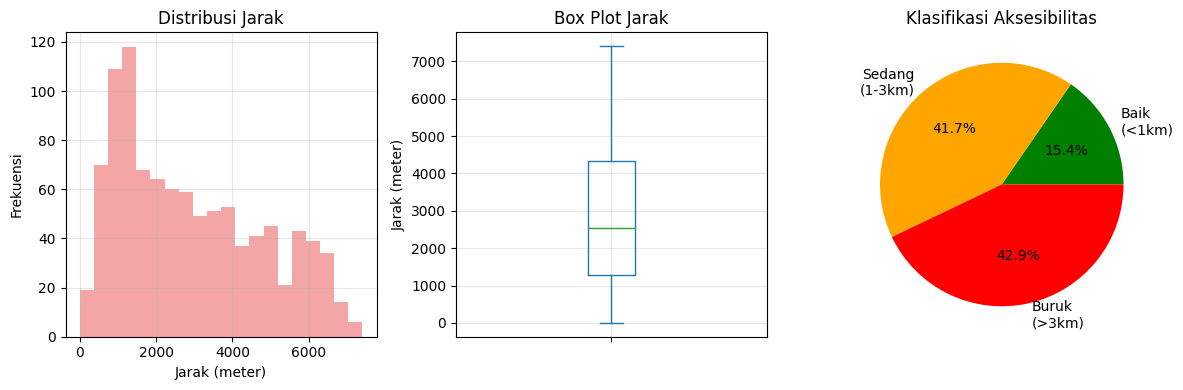

In [ ]:
if len(combined_health_facilities) > 0:
    print("\n📐 Menganalisis aksesibilitas...")

    # Temukan node terdekat untuk setiap fasilitas kesehatan
    combined_health_facilities['nearest_node'] = combined_health_facilities['geometry'].apply(
        lambda point: ox.distance.nearest_nodes(G, point.x, point.y)
    )

    # Ambil sample nodes untuk mempercepat perhitungan
    sample_nodes = list(G.nodes())
    if len(sample_nodes) > 1000:
        sample_nodes = np.random.choice(sample_nodes, 1000, replace=False)

    print(f"🔄 Menghitung jarak untuk {len(sample_nodes)} sample nodes...")

    min_distances = {}
    health_nodes = combined_health_facilities['nearest_node'].tolist()

    # Hitung jarak dari setiap sample node ke fasilitas kesehatan terdekat
    for node in sample_nodes:
        min_dist = float('inf')

        for target_node in health_nodes:
            try:
                path_length = nx.shortest_path_length(G, node, target_node, weight='length')
                min_dist = min(min_dist, path_length)
            except (nx.NetworkXNoPath, KeyError):
                continue

        min_distances[node] = min_dist if min_dist != float('inf') else 5000

    # Konversi ke series
    distances_series = pd.Series(min_distances)

    print(f"✅ Analisis selesai untuk {len(min_distances)} nodes")
    print(f"📊 Statistik jarak ke fasilitas kesehatan:")
    print(f"   - Jarak minimum: {distances_series.min():.0f} meter")
    print(f"   - Jarak maksimum: {distances_series.max():.0f} meter")
    print(f"   - Jarak rata-rata: {distances_series.mean():.0f} meter")
    print(f"   - Jarak median: {distances_series.median():.0f} meter")

    # Plot distribusi
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 3, 1)
    distances_series.plot(kind='hist', bins=20, alpha=0.7, color='lightcoral')
    plt.title('Distribusi Jarak')
    plt.xlabel('Jarak (meter)')
    plt.ylabel('Frekuensi')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 2)
    distances_series.plot(kind='box')
    plt.title('Box Plot Jarak')
    plt.ylabel('Jarak (meter)')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 3, 3)
    # Klasifikasi aksesibilitas
    good_access = (distances_series <= 1000).sum()
    medium_access = ((distances_series > 1000) & (distances_series <= 3000)).sum()
    poor_access = (distances_series > 3000).sum()

    categories = ['Baik\n(<1km)', 'Sedang\n(1-3km)', 'Buruk\n(>3km)']
    values = [good_access, medium_access, poor_access]
    colors = ['green', 'orange', 'red']

    plt.pie(values, labels=categories, colors=colors, autopct='%1.1f%%')
    plt.title('Klasifikasi Aksesibilitas')

    plt.tight_layout()
    plt.show()

# Peta Heatmap

In [ ]:
import folium
from folium.plugins import HeatMap

print("\n🗺️ Membuat peta heatmap aksesibilitas...")

# Koordinat tengah
center_lat = nodes['y'].mean()
center_lon = nodes['x'].mean()

# Buat peta folium
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# ---- Layer Heatmap Aksesibilitas Saja ----
if len(combined_health_facilities) > 0 and 'min_distances' in locals():
    print("🔥 Menambahkan heatmap...")

    heatmap_data = []
    max_distance = max(min_distances.values())

    for node_id, distance in min_distances.items():
        try:
            node_data = nodes.loc[node_id]
            # Intensitas dibalik: makin jauh = makin merah
            intensity = max(0, 1 - (distance / max_distance))
            heatmap_data.append([node_data['y'], node_data['x'], intensity])
        except KeyError:
            continue

    HeatMap(
        heatmap_data,
        min_opacity=0.3,
        max_zoom=18,
        radius=20,
        blur=15,
        gradient={
            0.0: 'red',
            0.4: 'orange',
            0.6: 'yellow',
            0.8: 'lightgreen',
            1.0: 'green'
        }
    ).add_to(m)

print("✅ Heatmap aksesibilitas selesai dibuat!")
m


🗺️ Membuat peta heatmap aksesibilitas...
🔥 Menambahkan heatmap...
✅ Heatmap aksesibilitas selesai dibuat!


# Visualisasi Peta Interaktif

In [ ]:
print("\n🗺️ Membuat peta interaktif...")

# Koordinat tengah
center_lat = nodes['y'].mean()
center_lon = nodes['x'].mean()

# Buat peta folium
m = folium.Map(location=[center_lat, center_lon], zoom_start=13)

# ---- Layer 1: Sample Jaringan Jalan ----
sample_edges = edges.sample(min(200, len(edges)))  # Sample kecil untuk speed
for idx, row in sample_edges.iterrows():
    coords = [[row.geometry.coords[i][1], row.geometry.coords[i][0]]
              for i in range(len(row.geometry.coords))]
    folium.PolyLine(coords, color='gray', weight=1, opacity=0.4).add_to(m)

# ---- Layer 2: Rumah Sakit dan Klinik ----
if len(combined_health_facilities) > 0:
    for _, row in combined_health_facilities.iterrows():
        if row['facility_type'] == 'hospital':
            color = 'red'
            icon = 'plus'
        else:  # clinic
            color = 'blue'
            icon = 'medkit'

        facility_name = row.get('name', f"{row['facility_name']} {_+1}")

        folium.Marker(
            location=[row.geometry.y, row.geometry.x],
            popup=f"<b>{row['facility_name']}</b><br>{facility_name}",
            icon=folium.Icon(color=color, icon=icon),
            tooltip=row['facility_name']
        ).add_to(m)

# ---- Layer 3: Heatmap Aksesibilitas ----
if len(combined_health_facilities) > 0 and 'min_distances' in locals():
    print("🔥 Menambahkan heatmap...")

    # Prepare heatmap data
    heatmap_data = []
    max_distance = max(min_distances.values())

    for node_id, distance in min_distances.items():
        try:
            node_data = nodes.loc[node_id]
            # Invert distance: jarak kecil = intensitas tinggi (hijau)
            intensity = max(0, 1 - (distance / max_distance))
            heatmap_data.append([node_data['y'], node_data['x'], intensity])
        except KeyError:
            continue

    # Tambahkan heatmap
    HeatMap(
        heatmap_data,
        min_opacity=0.3,
        max_zoom=18,
        radius=20,
        blur=15,
        gradient={
            0.0: 'red',        # Akses buruk
            0.4: 'orange',     # Akses sedang-buruk
            0.6: 'yellow',     # Akses sedang
            0.8: 'lightgreen', # Akses baik
            1.0: 'green'       # Akses sangat baik
        }
    ).add_to(m)

# ---- Layer 4: Top Nodes ----
for i, (node, centrality) in enumerate(top_degree_nodes):
    node_data = nodes.loc[node]
    folium.CircleMarker(
        location=[node_data['y'], node_data['x']],
        radius=6,
        popup=f"Simpul Strategis #{i+1}<br>Centrality: {centrality:.4f}",
        color='purple',
        fillColor='violet',
        fillOpacity=0.8
    ).add_to(m)

# Legend
legend_html = '''
<div style="position: fixed;
     bottom: 50px; left: 50px; width: 180px; height: 90px;
     background-color: white; border:2px solid grey; z-index:9999;
     font-size:12px; padding: 8px">
<h4>Legend</h4>
<p><i class="fa fa-plus" style="color:red"></i> Rumah Sakit</p>
<p><i class="fa fa-medkit" style="color:blue"></i> Klinik</p>
<p><i class="fa fa-circle" style="color:purple"></i> Simpul Strategis</p>
<p><b>Heatmap:</b> Hijau=Dekat, Merah=Jauh</p>
</div>
'''
m.get_root().html.add_child(folium.Element(legend_html))

print("✅ Peta interaktif berhasil dibuat!")


🗺️ Membuat peta interaktif...
🔥 Menambahkan heatmap...
✅ Peta interaktif berhasil dibuat!


In [ ]:
print("\n🎯 INSIGHT DAN TEMUAN:")
print("="*50)
print(f"1. Jaringan Jalan:")
print(f"   - Total: {len(edges)} jalan, {len(nodes)} simpul")
print(f"   - Konektivitas rata-rata: {np.mean(degrees):.2f}")

print(f"\n2. Fasilitas Kesehatan:")
hospital_count = len(health_facilities.get('hospital', []))
clinic_count = len(health_facilities.get('clinic', []))
print(f"   - Rumah Sakit: {hospital_count} unit")
print(f"   - Klinik: {clinic_count} unit")

if 'distances_series' in locals():
    total_nodes = len(distances_series)
    good_pct = good_access/total_nodes*100
    medium_pct = medium_access/total_nodes*100
    poor_pct = poor_access/total_nodes*100

    print(f"\n3. Aksesibilitas:")
    print(f"   - Rata-rata: {distances_series.mean():.0f}m")
    print(f"   - Akses baik: {good_pct:.1f}%")
    print(f"   - Akses sedang: {medium_pct:.1f}%")
    print(f"   - Akses buruk: {poor_pct:.1f}%")

print(f"\n4. Rekomendasi:")
if 'distances_series' in locals():
    if distances_series.mean() > 2000:
        print("   ⚠️ Perlu tambahan fasilitas kesehatan")
    if poor_pct > 30:
        print("   ⚠️ Banyak area dengan akses buruk")
    print("   ✅ Fokus pengembangan di area merah (heatmap)")

print("\n✅ Analisis cepat selesai!")

# Export hasil
results = {
    'Total Nodes': len(nodes),
    'Total Edges': len(edges),
    'Rumah Sakit': hospital_count,
    'Klinik': clinic_count,
    'Aksesibilitas Rata-rata (m)': distances_series.mean() if 'distances_series' in locals() else 'N/A',
    'Akses Baik (%)': f"{good_pct:.1f}" if 'distances_series' in locals() else 'N/A'
}

print(f"\n📋 RINGKASAN:")
for key, value in results.items():
    print(f"{key}: {value}")

# Tampilkan peta
m


🎯 INSIGHT DAN TEMUAN:
1. Jaringan Jalan:
   - Total: 21666 jalan, 9076 simpul
   - Konektivitas rata-rata: 4.77

2. Fasilitas Kesehatan:
   - Rumah Sakit: 7 unit
   - Klinik: 2 unit

3. Aksesibilitas:
   - Rata-rata: 2920m
   - Akses baik: 15.4%
   - Akses sedang: 41.7%
   - Akses buruk: 42.9%

4. Rekomendasi:
   ⚠️ Perlu tambahan fasilitas kesehatan
   ⚠️ Banyak area dengan akses buruk
   ✅ Fokus pengembangan di area merah (heatmap)

✅ Analisis cepat selesai!

📋 RINGKASAN:
Total Nodes: 9076
Total Edges: 21666
Rumah Sakit: 7
Klinik: 2
Aksesibilitas Rata-rata (m): 2919.6301150077347
Akses Baik (%): 15.4
